## Case 1 - Symmetric through cracks

We use the equations in 2.11. Since there is no bearing streass, $\beta_2 = 0$.

Before substuting values, we check the value of $N$

In [1]:
import numpy as np
c = 0.08 #in
D = 0.375 
r = D/2
W = 5.0 
t = 0.125
if W/D + 2.5 < 2:
    N = W/D + 2.5
else:
    N = 4.5
print(N)

4.5


In this case W/D = 13.3, so we use $N=4.5$

In [3]:
F_cr = (3.404+3.8172*c/r)/(1+3.9273*c/r-0.00695*(c/r)**2)
F_w = np.sqrt(1/np.cos(np.pi*r/W)/np.cos(np.pi*(r+c)/W))
F_ww = 1- ((1.32*W/D-0.14)**(-(.98+(.1*W/D)**0.1))-.02)*(2*c/(W-D))**N
#F_3 not needed since beta_2 = 0
beta = F_cr*F_w*F_ww
print ("beta = %.3f" % beta)
s = 5000/(t*W) #lb/in^2
K_I1 = s*np.sqrt(np.pi*c)*beta
print ("K_I = %.3f" % K_I1)

beta = 1.902
K_I = 7627.409


So for case I we have $K_I = 7.63 \text{ksi } \sqrt{\text{in}}$

## Case 2 - Single through crack

We use 2.12, once again $\beta_2$ may be omitted since there is no bearing stress
We check N first.

In [4]:
N = 2.65 - 0.24*(2.75-W/D)**2
print(N)
if N < 2.275:
    N = 2.275
print (N)

-24.23166666666667
2.275


The original expression would give $N=-24.23$, which is less than 2.275, so we let $N=2.275$

In [5]:
beta_3 = 0.7071 + 0.7548*r/(r+c) + 0.3415*(r/(r+c))**2 + 0.6420*(r/(r+c))**3 + 0.9196*(r/(r+c))**4
F_w = np.sqrt(1/np.cos(np.pi*r/W)/np.cos(np.pi*(r+c/2)/(W-c)))
F_ww = 1- N**(-W/D)*(2*c/(W-D))**(-W/D)*(2*c/(W-D))**(W/D+.5)
#F_4 not needed since beta_2 = 0
beta = beta_3 * F_w * F_ww
print ("beta = %.3f" % beta)
K_I2 = s*np.sqrt(np.pi*c)*beta
print ("K_I = %.3f" % K_I2)

beta = 1.863
K_I = 7472.887


For case 2 we have $K_I = 7.47 \text{ksi } \sqrt{\text{in}}$, notice that this a higher stress intensity than for two cracks

## Case 3 - Symmetric corner cracks

For corner cracks around a hole we use 3.1, with $a/c \le 1$ we will use 3.1g-3.1n (instead of 3.1o-v). Since we have symmetric cracks, we use $n=2$

In [6]:
a = 0.02
n = 2
b = W/2
phi = np.linspace(0,np.pi/2)
f_w = np.sqrt(1/np.cos(np.pi*r/(2*b))/np.cos(np.pi*(2*r+n*c)/(4*(b-c)+2*n*c)*np.sqrt(a/t)))
lam = 1.0/(1.0+(c/r)*np.cos(0.85*phi))
g_2 = (1+.358*lam+1.425*lam**2-1.578*lam**3+2.156*lam**4)/(1+.13*lam**2)
M_1 = 1.13 - 0.09*a/c
M_2 = -0.54 + 0.89/(0.2+a/c)
M_3 = 0.5 - 1/(0.65+a/c) + 14*(1-a/c)**24
Q = 1 + 1.464*(a/c)**1.65
g_1 = 1+ (0.1+0.35*(a/t)**2)*(1-np.sin(phi))**2
g_3 = (1+0.04*(a/c))*(1+0.1*(1-np.cos(phi))**2)*(0.85+0.15*(a/t)**.25)
g_4 = 1-0.7*(1-a/t)*(a/c-0.2)*(1-a/c)
f_phi = ((a/c)**2*np.cos(phi)**2+np.sin(phi)**2)**.25
F_ch = (M_1 + M_2*(a/t)**2 + M_3*(a/t)**4)*g_1*g_2*g_3*g_4*f_phi*f_w
beta = np.sqrt(1/Q)*F_ch
K_I3 = s*np.sqrt(np.pi*a)*beta

Here we have left $\phi$ variable $0<\phi<\pi/2$, so we plot the stress intensity for varying $\phi$

K_I = 5564.720


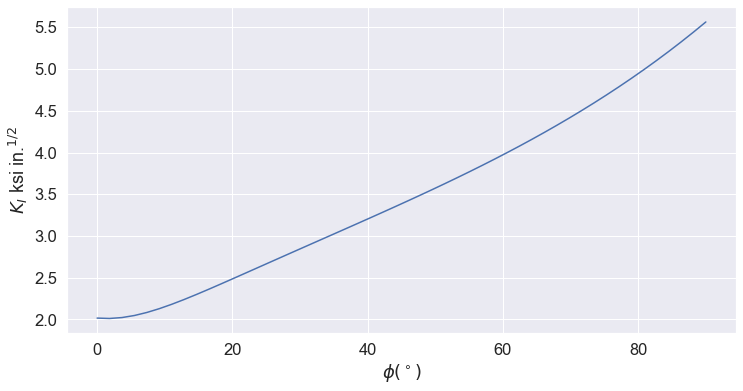

In [7]:
from matplotlib import pyplot as plt
#optional, for prettier default color scheme
import seaborn as sb
#make fonts bigger
sb.set(font_scale=1.5)
#only needed for "live notebooks" such as this demo
%matplotlib inline
fig = plt.figure(figsize=(12,6))
plt.plot(phi*180/np.pi,K_I3/1000)
plt.xlabel(r'$\phi (^\circ)$')
plt.ylabel(r'$K_I$ ksi in.$^{1/2}$')
print ("K_I = %.3f" % K_I3[-1])

The maximum $K_I$ would occur at $\phi = \pi/2$, $K_I = 5.56 \text{ksi } \sqrt{\text{in}}$

## Case 4 - Single corner crack
For a single corner crack, we can use the same equations as above, with $n=1$, then we will add the correction factor in (3.2)

In [8]:
a = 0.02
n = 1
b = W/2
phi = np.linspace(0,np.pi/2)
f_w = np.sqrt(1/np.cos(np.pi*r/(2*b))/np.cos(np.pi*(2*r+n*c)/(4*(b-c)+2*n*c)*np.sqrt(a/t)))
lam = 1.0/(1.0+(c/r)*np.cos(0.85*phi))
g_2 = (1+.358*lam+1.425*lam**2-1.578*lam**3+2.156*lam**4)/(1+.13*lam**2)
M_1 = 1.13 - 0.09*a/c
M_2 = -0.54 + 0.89/(0.2+a/c)
M_3 = 0.5 - 1/(0.65+a/c) + 14*(1-a/c)**24
Q = 1 + 1.464*(a/c)**1.65
g_1 = 1+ (0.1+0.35*(a/t)**2)*(1-np.sin(phi))**2
g_3 = (1+0.04*(a/c))*(1+0.1*(1-np.cos(phi))**2)*(0.85+0.15*(a/t)**.25)
g_4 = 1-0.7*(1-a/t)*(a/c-0.2)*(1-a/c)
f_phi = ((a/c)**2*np.cos(phi)**2+np.sin(phi)**2)**.25
F_ch = (M_1 + M_2*(a/t)**2 + M_3*(a/t)**4)*g_1*g_2*g_3*g_4*f_phi*f_w
beta = np.sqrt(1/Q)*F_ch
K_Isymm = s*np.sqrt(np.pi*a)*beta
K_I4 = np.sqrt((4/np.pi + a*c/2/t/r)/(4/np.pi + a*c/t/r))*K_Isymm

We can add this to the plot and compare max values

K_I = 5491.897


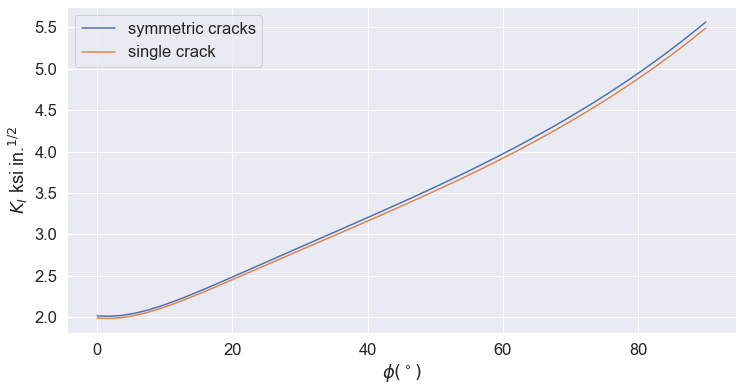

In [9]:
fig = plt.figure(figsize=(12,6))
plt.plot(phi*180/np.pi,K_I3/1000,label='symmetric cracks')
plt.plot(phi*180/np.pi,K_I4/1000,label='single crack')
plt.legend(loc='best')
plt.xlabel(r'$\phi (^\circ)$')
plt.ylabel(r'$K_I$ ksi in.$^{1/2}$')
print ("K_I = %.3f" % K_I4[-1])

We see that the single crack has only a moderately lower stress intensity factor, with a max value of $K_I = 5.49 \text{ksi } \sqrt{\text{in}}$

## Case 5 - Symmetric surface cracks

For symmetric surface cracks, we use (3.3) with $a/c < 1$

In [10]:
n=2
f_w = np.sqrt(1/np.cos(np.pi*r/(2*b))/np.cos(np.pi*(2*r+n*c)/(4*(b-c)+2*n*c)*np.sqrt(a/t)))
g_1 = 1-((a/t)**4*(2.6-2*a/t)**.5)/(1+4*a/c)*np.cos(phi)
lam = 1.0/(1.0+(c/r)*np.cos(0.9*phi))
g_2 = (1+.358*lam+1.425*lam**2-1.578*lam**3+2.156*lam**4)/(1+.08*lam**2)
g_3 = 1 + 0.1*(1-np.cos(phi))**2*(1-a/t)**10
Q = 1+1.464*(a/c)**1.65
M_1 = 1
M_2 = 0.05/(0.11+(a/c)**(1.5))
M_3 = 0.29/(0.23+(a/c)**1.5)
f_phi = ((a/c)**2*np.cos(phi)**2+np.sin(phi)**2)**.25
F_sh = (M_1 + M_2*(a/t)**2 + M_3*(a/t)**4)*g_1*g_2*g_3*f_phi*f_w
beta = np.sqrt(1/Q)*F_sh
K_I5 = s*np.sqrt(np.pi*a)*beta
print ("K_I = %.3f" % K_I5[-1])

K_I = 5308.220


The maximum stress intensity factor in this case is $K_I = 5.31 \text{ksi } \sqrt{\text{in}}$

## Case 6 - Single surface crack

We handle a single surface crack the same way as a single corner crack, using $n=1$ and a correction factor (3.4)

In [11]:
n=1
f_w = np.sqrt(1/np.cos(np.pi*r/(2*b))/np.cos(np.pi*(2*r+n*c)/(4*(b-c)+2*n*c)*np.sqrt(a/t)))
g_1 = 1-((a/t)**4*(2.6-2*a/t)**.5)/(1+4*a/c)*np.cos(phi)
lam = 1.0/(1.0+(c/r)*np.cos(0.9*phi))
g_2 = (1+.358*lam+1.425*lam**2-1.578*lam**3+2.156*lam**4)/(1+.08*lam**2)
g_3 = 1 + 0.1*(1-np.cos(phi))**2*(1-a/t)**10
Q = 1+1.464*(a/c)**1.65
M_1 = 1
M_2 = 0.05/(0.11+(a/c)**(1.5))
M_3 = 0.29/(0.23+(a/c)**1.5)
f_phi = ((a/c)**2*np.cos(phi)**2+np.sin(phi)**2)**.25
F_sh = (M_1 + M_2*(a/t)**2 + M_3*(a/t)**4)*g_1*g_2*g_3*f_phi*f_w
beta = np.sqrt(1/Q)*F_sh
K_Isymm = s*np.sqrt(np.pi*a)*beta
K_I6 = np.sqrt((4/np.pi + a*c/2/t/r)/(4/np.pi + a*c/t/r))*K_Isymm
print ("K_I = %.3f" % K_I6[-1])

K_I = 5238.754


The maximum stress intensity factor in this case is $K_I = 5.24 \text{ksi } \sqrt{\text{in}}$

K_I = 5491.897


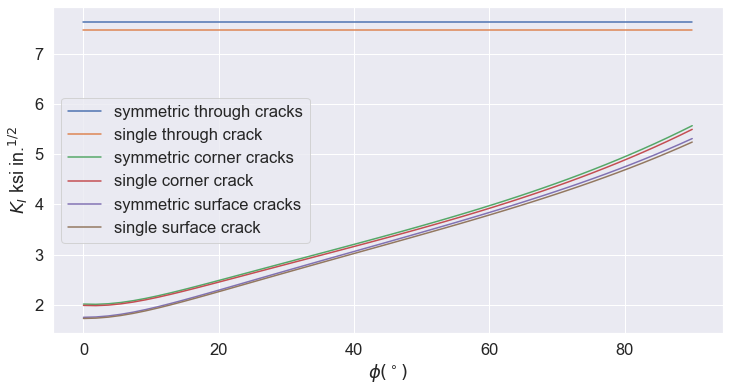

In [12]:
fig = plt.figure(figsize=(12,6))
plt.plot(phi*180/np.pi,np.ones(len(phi))*K_I1/1000,label='symmetric through cracks')
plt.plot(phi*180/np.pi,np.ones(len(phi))*K_I2/1000,label='single through crack')
plt.plot(phi*180/np.pi,K_I3/1000,label='symmetric corner cracks')
plt.plot(phi*180/np.pi,K_I4/1000,label='single corner crack')
plt.plot(phi*180/np.pi,K_I5/1000,label='symmetric surface cracks')
plt.plot(phi*180/np.pi,K_I6/1000,label='single surface crack')
plt.legend(loc='best')
plt.xlabel(r'$\phi (^\circ)$')
plt.ylabel(r'$K_I$ ksi in.$^{1/2}$')
print ("K_I = %.3f" % K_I4[-1])